In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# task2.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации
import numpy as np

def sigmoid(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def deriv_sigmoid(x):
    return 1 - sigmoid(x) * sigmoid(x)

def mae_loss(y_true, y_pred):
  return (abs(y_true - y_pred) ).mean()

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
        for x, y_true in zip(data, all_y_trues):
            # --- Do a feedforward (we'll need these values later)
            sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
            h1 = sigmoid(sum_h1)

            sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
            h2 = sigmoid(sum_h2)

            sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
            o1 = sigmoid(sum_o1)
            y_pred = o1

            # --- Calculate partial derivatives.
            # --- Naming: d_L_d_w1 represents "partial L / partial w1"
            d_L_d_ypred = -2 * (y_true - y_pred)

            # Neuron o1
            d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
            d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
            d_ypred_d_b3 = deriv_sigmoid(sum_o1)

            d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
            d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

            # Neuron h1
            d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
            d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
            d_h1_d_b1 = deriv_sigmoid(sum_h1)

            # Neuron h2
            d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
            d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
            d_h2_d_b2 = deriv_sigmoid(sum_h2)

            # --- Update weights and biases
            # Neuron h1
            self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
            self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
            self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

            # Neuron h2
            self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
            self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
            self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

            # Neuron o1
            self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
            self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
            self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss_mse = mse_loss(all_y_trues, y_preds)
                loss_mae = mae_loss(all_y_trues, y_preds)
                print("Epoch %d loss_mse: %.5f loss_mae: %.5f" % (epoch, loss_mse,loss_mae))


data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
  
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-0.3333,-0.27778]) # 128 pounds, 63 inches
frank = np.array([0.3417,0.13889])  # 155 pounds, 68 inches
print("Emily: %.6f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.6f" % network.feedforward(frank)) # 0.039 - M

Epoch 0 loss_mse: 0.98755 loss_mae: 0.99376
Epoch 0 loss_mse: 0.99045 loss_mae: 0.99521
Epoch 0 loss_mse: 0.99259 loss_mae: 0.99628
Epoch 0 loss_mse: 0.61944 loss_mae: 0.74636
Epoch 10 loss_mse: 0.50051 loss_mae: 0.55574
Epoch 10 loss_mse: 0.50020 loss_mae: 0.55577
Epoch 10 loss_mse: 0.49998 loss_mae: 0.55576
Epoch 10 loss_mse: 0.49972 loss_mae: 0.55452
Epoch 20 loss_mse: 0.49124 loss_mae: 0.53465
Epoch 20 loss_mse: 0.49083 loss_mae: 0.53458
Epoch 20 loss_mse: 0.49043 loss_mae: 0.53469
Epoch 20 loss_mse: 0.49036 loss_mae: 0.53380
Epoch 30 loss_mse: 0.47272 loss_mae: 0.51643
Epoch 30 loss_mse: 0.47061 loss_mae: 0.51571
Epoch 30 loss_mse: 0.46831 loss_mae: 0.51584
Epoch 30 loss_mse: 0.46830 loss_mae: 0.51387
Epoch 40 loss_mse: 0.05117 loss_mae: 0.22056
Epoch 40 loss_mse: 0.04345 loss_mae: 0.17915
Epoch 40 loss_mse: 0.04320 loss_mae: 0.16088
Epoch 40 loss_mse: 0.03303 loss_mae: 0.15502
Epoch 50 loss_mse: 0.00585 loss_mae: 0.05918
Epoch 50 loss_mse: 0.00584 loss_mae: 0.05613
Epoch 50 loss_

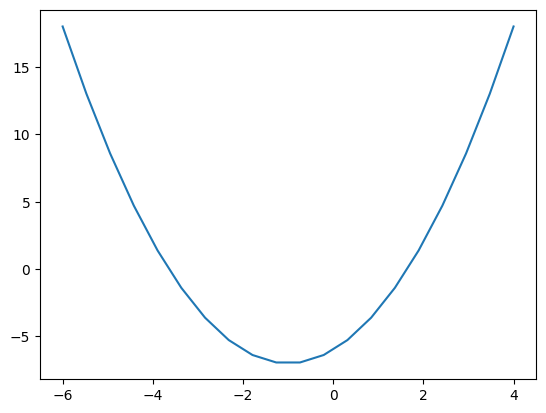

In [10]:
# task2.5. Реализовать экстемумы через градиентный спуск: x**2+2x-6

# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(-6, 4, 20)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 + 2 * plot_x1 - 6)
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую квадратного уравнения
plt.plot(plot_x1, plot_y1)
plt.show()


In [11]:
# Функция градиента
def dJ(x):
    return 2 * x + 2

# Функция потерь
def J(x):
    return (x ** 2 + 2 * x - 6)

x = 0.0
# Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
# Скорость обучения
learn_rate = 0.1
# Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = dJ(x)
    last_x = x
    x =x - learn_rate * dj
    history_x.append(x)

    # Если итерация достигнута точно, расчет завершен
    if abs(J(x)-J(last_x))<0.0000000001 :
        break

history_y = J(np.array(history_x))
print(f'Координата x в минимуме параболы равна {round(x, 1)}')

Координата x в минимуме параболы равна -1.0


In [ ]:
# task2.6. Запустить DL2.CNN с различными параметрами функции активации (sigmoid), 
# количеством фильтров и количеством эпох (от 1 до 4)